Evaluation (for GloVe-CNN)

Load the validation datasets

In [1]:
import pandas as pd
import numpy as np

from pathlib import Path
from datetime import datetime
import pickle

In [2]:
import sys
 
# setting path for common utils script
sys.path.append('../')

import str_cleaning_functions
import dataset_loader

import evaluation_functions


SAVE_EVAL_RESULTS = True

In [11]:
DATASET_SIZE = 120
DATASET_IS_BALANCED = True


MAX_FEATURES = 20000        # max_features params for CountVectorizer

training_name = 'glove-cnn-{}_{}k_{}'.format(
    MAX_FEATURES,
    DATASET_SIZE,
    'bal' if DATASET_IS_BALANCED else 'imbal'
)

training_args_datetime = datetime(year=2023, month=12, day=20)
training_storing_folder = Path(training_name).resolve()

In [4]:
# load validation dataset. Same for all models

X_imbal_valid, y_imbal_valid, X_bal_valid, y_bal_valid = dataset_loader.load_validation_dataset()

Loaded validation dataset

Validation dataset imbalanced class distribution
review_score
1    774377
0    150928
Name: count, dtype: int64
Validation dataset balanced class distribution
review_score
0    150672
1    150672
Name: count, dtype: int64





In [5]:
# rerun this cell if want to evaluate a new model

X_train, X_test, y_train, y_test = dataset_loader.load_presampled_traintest_dataset(DATASET_SIZE, DATASET_IS_BALANCED)

Loaded dataset size: 120k, is_balanced: True

Training dataset class distribution
review_score
0    54060
1    53940
Name: count, dtype: int64
Testing dataset class distribution
review_score
1    6060
0    5940
Name: count, dtype: int64





In [6]:
# data cleaning function
# same as training script

def cleaning_arr(str_arr):
    str_arr = str_arr.apply(lambda x: str_cleaning_functions.clean(x))
    str_arr = str_arr.apply(lambda x: str_cleaning_functions.deEmojify(x))
    str_arr = str_arr.apply(lambda x: x.lower())
    str_arr = str_arr.apply(lambda x: str_cleaning_functions.remove_num(x))
    str_arr = str_arr.apply(lambda x: str_cleaning_functions.remove_symbols(x))
    str_arr = str_arr.apply(lambda x: str_cleaning_functions.remove_punctuation(x))
    # str_arr = str_arr.apply(lambda x: str_cleaning_functions.remove_stopword(x))      # no need to remove stopwords, as previous study shown including stopwords can improve performance (https://aclanthology.org/P12-1092.pdf)
    str_arr = str_arr.apply(lambda x: str_cleaning_functions.unify_whitespaces(x))
    # str_arr = str_arr.apply(lambda x: str_cleaning_functions.stemming(x))


    return str_arr

In [7]:
# rerun this cell if want to evaluate a new model

X_train = cleaning_arr(X_train)
X_test = cleaning_arr(X_test)

# X_train = X_train.to_numpy()
# X_test = X_test.to_numpy()
# y_train = y_train.to_numpy()
# y_test = y_test.to_numpy()

In [8]:
# applying data cleaning to all datasets
X_imbal_valid = cleaning_arr(X_imbal_valid)
X_bal_valid = cleaning_arr(X_bal_valid)

# X_bal_valid = X_bal_valid.to_numpy()
# y_bal_valid = y_bal_valid.to_numpy()

# X_imbal_valid = X_imbal_valid.to_numpy()
# y_imbal_valid = y_imbal_valid.to_numpy()

In [9]:
print('Validation (imbalanced) set')
print(len(X_imbal_valid))
print(len(y_imbal_valid))
print()
print('Validation (balanced) set')
print(len(X_bal_valid))
print(len(y_bal_valid))

print()
print()

print('Validation (imbalanced) set')
print(pd.Series(y_imbal_valid).value_counts())
print()
print('Validation (balanced) set')
print(pd.Series(y_bal_valid).value_counts())

print()
print()

print('validation (imbalanced) set datatype')
print(type(X_imbal_valid))
print(type(y_imbal_valid))
print()
print('validation (balanced) set datatype')
print(type(X_bal_valid))
print(type(y_bal_valid))

Validation (imbalanced) set
925305
925305

Validation (balanced) set
301344
301344


Validation (imbalanced) set
review_score
1    774377
0    150928
Name: count, dtype: int64

Validation (balanced) set
review_score
0    150672
1    150672
Name: count, dtype: int64


validation (imbalanced) set datatype
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>

validation (balanced) set datatype
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


---

Load the models

Load the text vectorizer, model itself

Then transform the data through the vectorizer

In [12]:
import pickle

import tensorflow as tf
import keras

text_vectorizer_path = Path.joinpath(training_storing_folder, "{}_{}_textvectorizer.pkl".format(
    training_name,
    training_args_datetime.strftime("%Y-%m-%d")
))
vectorizer_from_disk = pickle.load(open(text_vectorizer_path, 'rb'))
vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=MAX_FEATURES,
    output_sequence_length=512)

vectorizer.set_weights(vectorizer_from_disk['weights'])

model_path = Path.joinpath(training_storing_folder, "{}_{}_model.keras".format(
    training_name,
    training_args_datetime.strftime("%Y-%m-%d")
))
model = keras.models.load_model(model_path)

print('\n\n')
print('Loaded text vectorizer from {}'.format(text_vectorizer_path))
print('Loaded model from {}'.format(model_path))

2023-12-20 23:03:58.626765: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-20 23:03:58.682563: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-20 23:03:58.682618: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-20 23:03:58.683770: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-20 23:03:58.683804: I external/local_xla/xla/stream_executor




Loaded text vectorizer from /root/FYP/NLP/dev-workspace/sa/glove-cnn_2023-12-12/glove-cnn-20000_120k_bal/glove-cnn-20000_120k_bal_2023-12-20_textvectorizer.pkl
Loaded model from /root/FYP/NLP/dev-workspace/sa/glove-cnn_2023-12-12/glove-cnn-20000_120k_bal/glove-cnn-20000_120k_bal_2023-12-20_model.keras


In [13]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 512)]                0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 512, 300)             6000600   ['input_5[0][0]']             
                                                                                                  
 conv1d_6 (Conv1D)           (None, 506, 128)             268928    ['embedding_2[0][0]']         
                                                                                                  
 conv1d_7 (Conv1D)           (None, 506, 128)             268928    ['embedding_2[0][0]']         
                                                                                            

In [14]:
# create keras dataset object for evaluation
# same as training script

BATCH_SIZE = 128

import tensorflow as tf

# train_dataset = tf.data.Dataset.from_tensor_slices((X_train_subset, y_train_subset))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
valid_bal_dataset = tf.data.Dataset.from_tensor_slices((X_bal_valid, y_bal_valid))
valid_imbal_dataset = tf.data.Dataset.from_tensor_slices((X_imbal_valid, y_imbal_valid))

In [15]:
# batch first

test_dataset = test_dataset.batch(BATCH_SIZE)
valid_bal_dataset = valid_bal_dataset.batch(BATCH_SIZE)
valid_imbal_dataset = valid_imbal_dataset.batch(BATCH_SIZE)

In [16]:
# apply text vectorizer to test and validation datasets

test_dataset = test_dataset.map(lambda x, y: (vectorizer(x), y))
valid_bal_dataset = valid_bal_dataset.map(lambda x, y: (vectorizer(x), y))
valid_imbal_dataset = valid_imbal_dataset.map(lambda x, y: (vectorizer(x), y))

In [17]:
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)
valid_bal_dataset = valid_bal_dataset.prefetch(tf.data.AUTOTUNE)
valid_imbal_dataset = valid_imbal_dataset.prefetch(tf.data.AUTOTUNE)

---

Evaluation

on test set

In [18]:
# create folders for storing evaluation metrics

eval_metrics_folder = Path.joinpath(training_storing_folder, 'eval_metrics')

if not eval_metrics_folder.exists():
    eval_metrics_folder.mkdir()

eval_test_prefix = 'test'
eval_valid_bal_prefix = 'valid_bal'
eval_valid_imbal_prefix = 'valid_imbal'

eval_test_folder = Path.joinpath(eval_metrics_folder, eval_test_prefix)
eval_valid_bal_folder = Path.joinpath(eval_metrics_folder, eval_valid_bal_prefix)
eval_valid_imbal_folder = Path.joinpath(eval_metrics_folder, eval_valid_imbal_prefix)

if not eval_test_folder.exists():
    eval_test_folder.mkdir()

if not eval_valid_bal_folder.exists():
    eval_valid_bal_folder.mkdir()

if not eval_valid_imbal_folder.exists():
    eval_valid_imbal_folder.mkdir()

In [19]:
y_test_pred_prob_raw = model.predict(test_dataset)

y_test_pred = np.argmax(y_test_pred_prob_raw, axis=1)

y_test_pred_prob = y_test_pred_prob_raw if len(np.unique(y_test_pred)) > 2 \
                else np.array([y_test_pred_prob_raw[i, pred] for i, pred in enumerate(list(y_test_pred))])

2023-12-20 23:04:00.850139: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8900


94/94 [==============================] - 1s 5ms/step


In [20]:
test_classification_report_dict = evaluation_functions.print_classification_report(y_test, y_test_pred)

Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      5940
           1       0.91      0.83      0.86      6060

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



TN - True Negative 5429
FN - False Negative 1055
TP - True Positive 5005
FP - False Positive 511
Accuracy Rate: 0.8695
Misclassification Rate: 0.1305
F1-Score: 0.8693368743466843
ROC-AUC 0.8699403273660699


In [21]:
test_classification_report_dict

{'0': {'precision': 0.8372917951881554,
  'recall': 0.913973063973064,
  'f1-score': 0.8739536381197681,
  'support': 5940.0},
 '1': {'precision': 0.9073604060913706,
  'recall': 0.8259075907590759,
  'f1-score': 0.8647201105736005,
  'support': 6060.0},
 'accuracy': 0.8695,
 'macro avg': {'precision': 0.872326100639763,
  'recall': 0.86994032736607,
  'f1-score': 0.8693368743466843,
  'support': 12000.0},
 'weighted avg': {'precision': 0.8726764436942791,
  'recall': 0.8695,
  'f1-score': 0.8692907067089536,
  'support': 12000.0}}

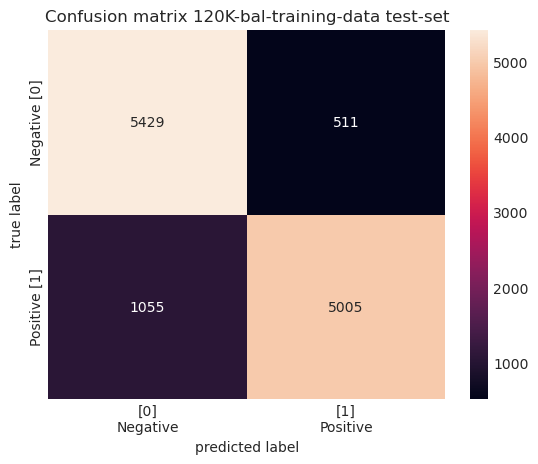

In [22]:
import matplotlib as plt
plt.style.use('seaborn-v0_8-dark')

evaluation_functions.create_confusion_matrix_graph(
    y_test,
    y_test_pred,
    f'Confusion matrix {DATASET_SIZE}K-{"bal" if DATASET_IS_BALANCED else "imbal"}-training-data test-set',
    save=SAVE_EVAL_RESULTS,
    save_filename=Path.joinpath(eval_test_folder, f'confusion_matrix_test.png')
)

0.4130576113166872


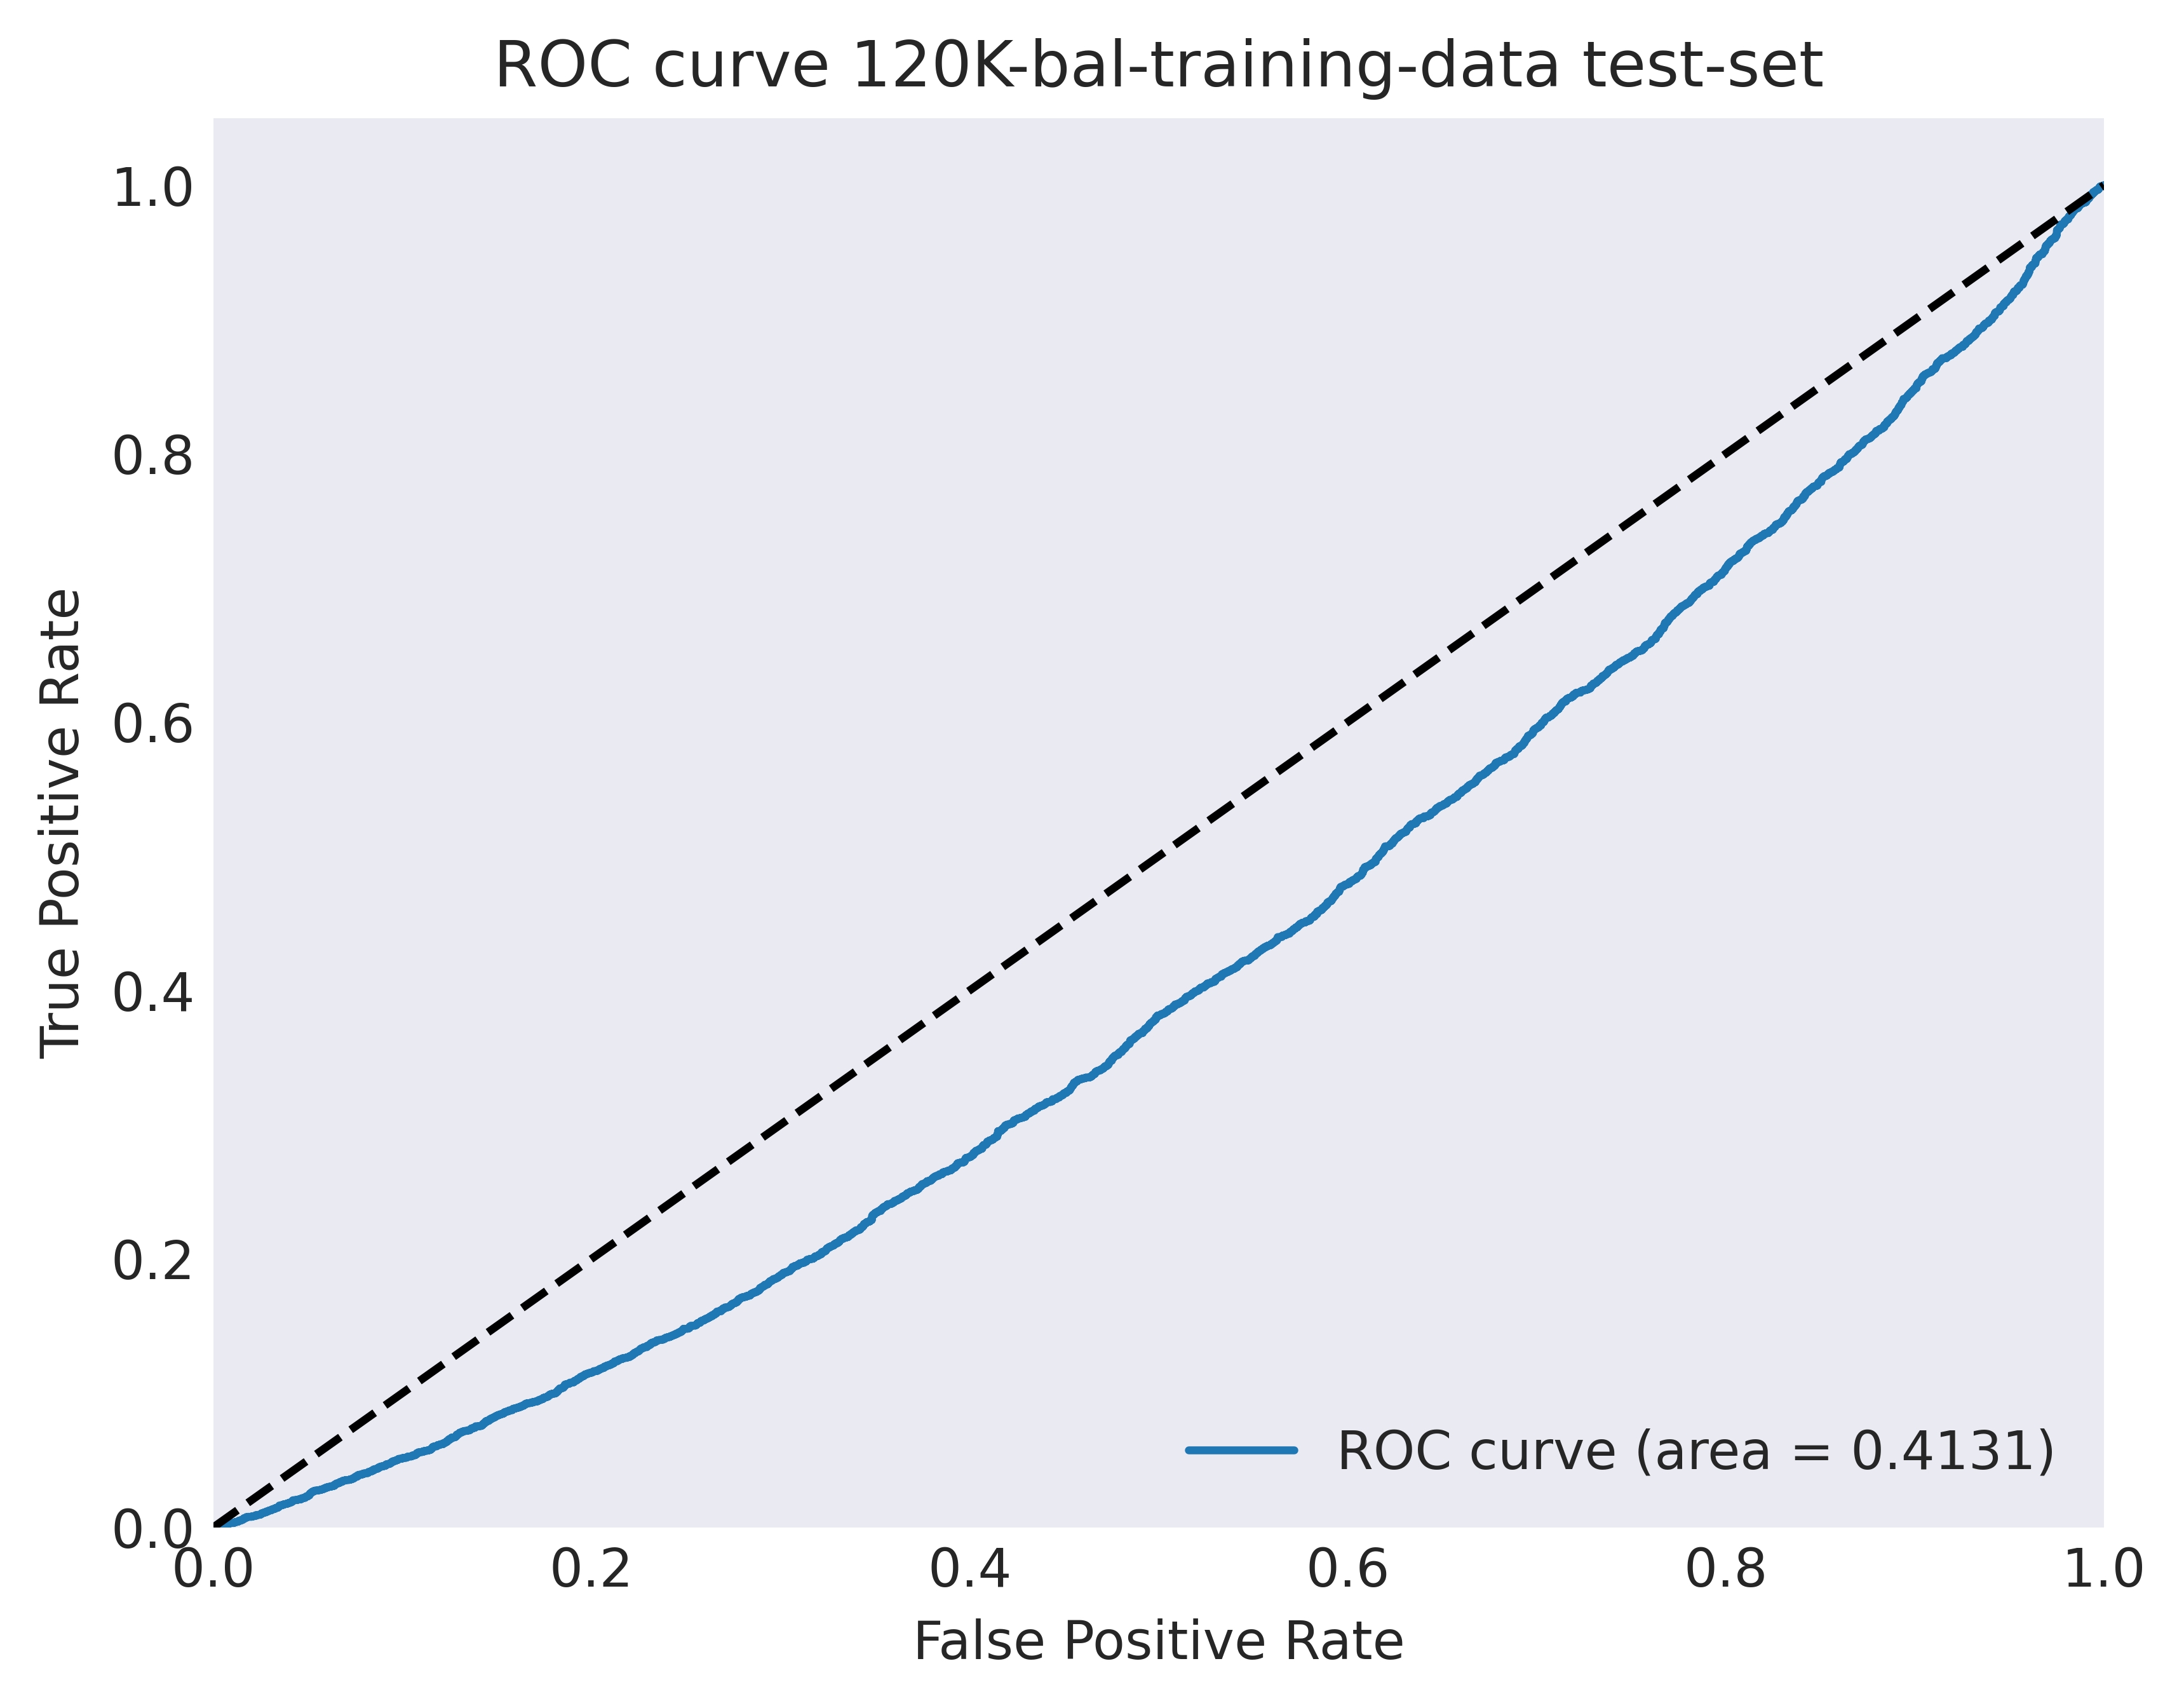

In [23]:
evaluation_functions.plot_roc_curve_binary(
    y_test,
    y_test_pred_prob,
    f'ROC curve {DATASET_SIZE}K-{"bal" if DATASET_IS_BALANCED else "imbal"}-training-data test-set',
    save=SAVE_EVAL_RESULTS,
    save_filename=Path.joinpath(eval_test_folder, f'roc_curve_test.png')
)

In [24]:
from sklearn.metrics import roc_auc_score

# import importlib
# importlib.reload(evaluation_functions)

# add ROC area to report_dict
test_classification_report_dict['roc_auc'] = roc_auc_score(y_test, y_test_pred_prob)

test_report_df = evaluation_functions.create_classification_report_df(
    test_classification_report_dict, 
    training_name)

# save the dataframe
if SAVE_EVAL_RESULTS:
    test_report_df.to_csv(Path.joinpath(eval_test_folder, "{}_{}_test_report.csv".format(
        training_name,
        training_args_datetime.strftime("%Y-%m-%d")
    )))

on fixed balanced validation set

In [25]:
y_bal_valid_pred_prob_raw = model.predict(valid_bal_dataset)

y_bal_valid_pred = np.argmax(y_bal_valid_pred_prob_raw, axis=1)

y_bal_valid_pred_prob = y_bal_valid_pred_prob_raw if len(np.unique(y_bal_valid_pred)) > 2 \
                else np.array([y_bal_valid_pred_prob_raw[i, pred] for i, pred in enumerate(list(y_bal_valid_pred))])

   1/2355 [..............................] - ETA: 57s

2355/2355 [==============================] - 9s 4ms/step


In [26]:
bal_valid_classification_result_dict = evaluation_functions.print_classification_report(y_bal_valid, y_bal_valid_pred)

Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88    150672
           1       0.91      0.83      0.87    150672

    accuracy                           0.87    301344
   macro avg       0.88      0.87      0.87    301344
weighted avg       0.88      0.87      0.87    301344



TN - True Negative 138058
FN - False Negative 25610
TP - True Positive 125062
FP - False Positive 12614
Accuracy Rate: 0.8731549325687586
Misclassification Rate: 0.12684506743124138
F1-Score: 0.8729185712541949
ROC-AUC 0.8731549325687586


In [27]:
bal_valid_classification_result_dict

{'0': {'precision': 0.8435246963364861,
  'recall': 0.9162817245407242,
  'f1-score': 0.8783991855952155,
  'support': 150672.0},
 '1': {'precision': 0.9083790929428514,
  'recall': 0.8300281405967931,
  'f1-score': 0.8674379569131744,
  'support': 150672.0},
 'accuracy': 0.8731549325687586,
 'macro avg': {'precision': 0.8759518946396687,
  'recall': 0.8731549325687586,
  'f1-score': 0.8729185712541949,
  'support': 301344.0},
 'weighted avg': {'precision': 0.8759518946396687,
  'recall': 0.8731549325687586,
  'f1-score': 0.8729185712541949,
  'support': 301344.0}}

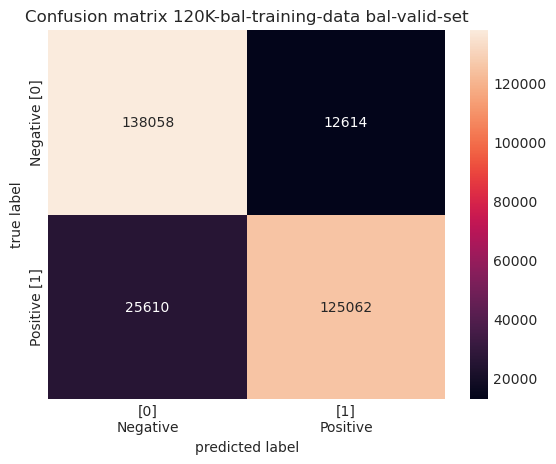

In [28]:
evaluation_functions.create_confusion_matrix_graph(
    y_bal_valid, y_bal_valid_pred, 
    f'Confusion matrix {DATASET_SIZE}K-{"bal" if DATASET_IS_BALANCED else "imbal"}-training-data bal-valid-set',
    save=SAVE_EVAL_RESULTS,
    save_filename=Path.joinpath(eval_valid_bal_folder, f'confusion_matrix_valid_bal.png')
)

0.40536168812539336


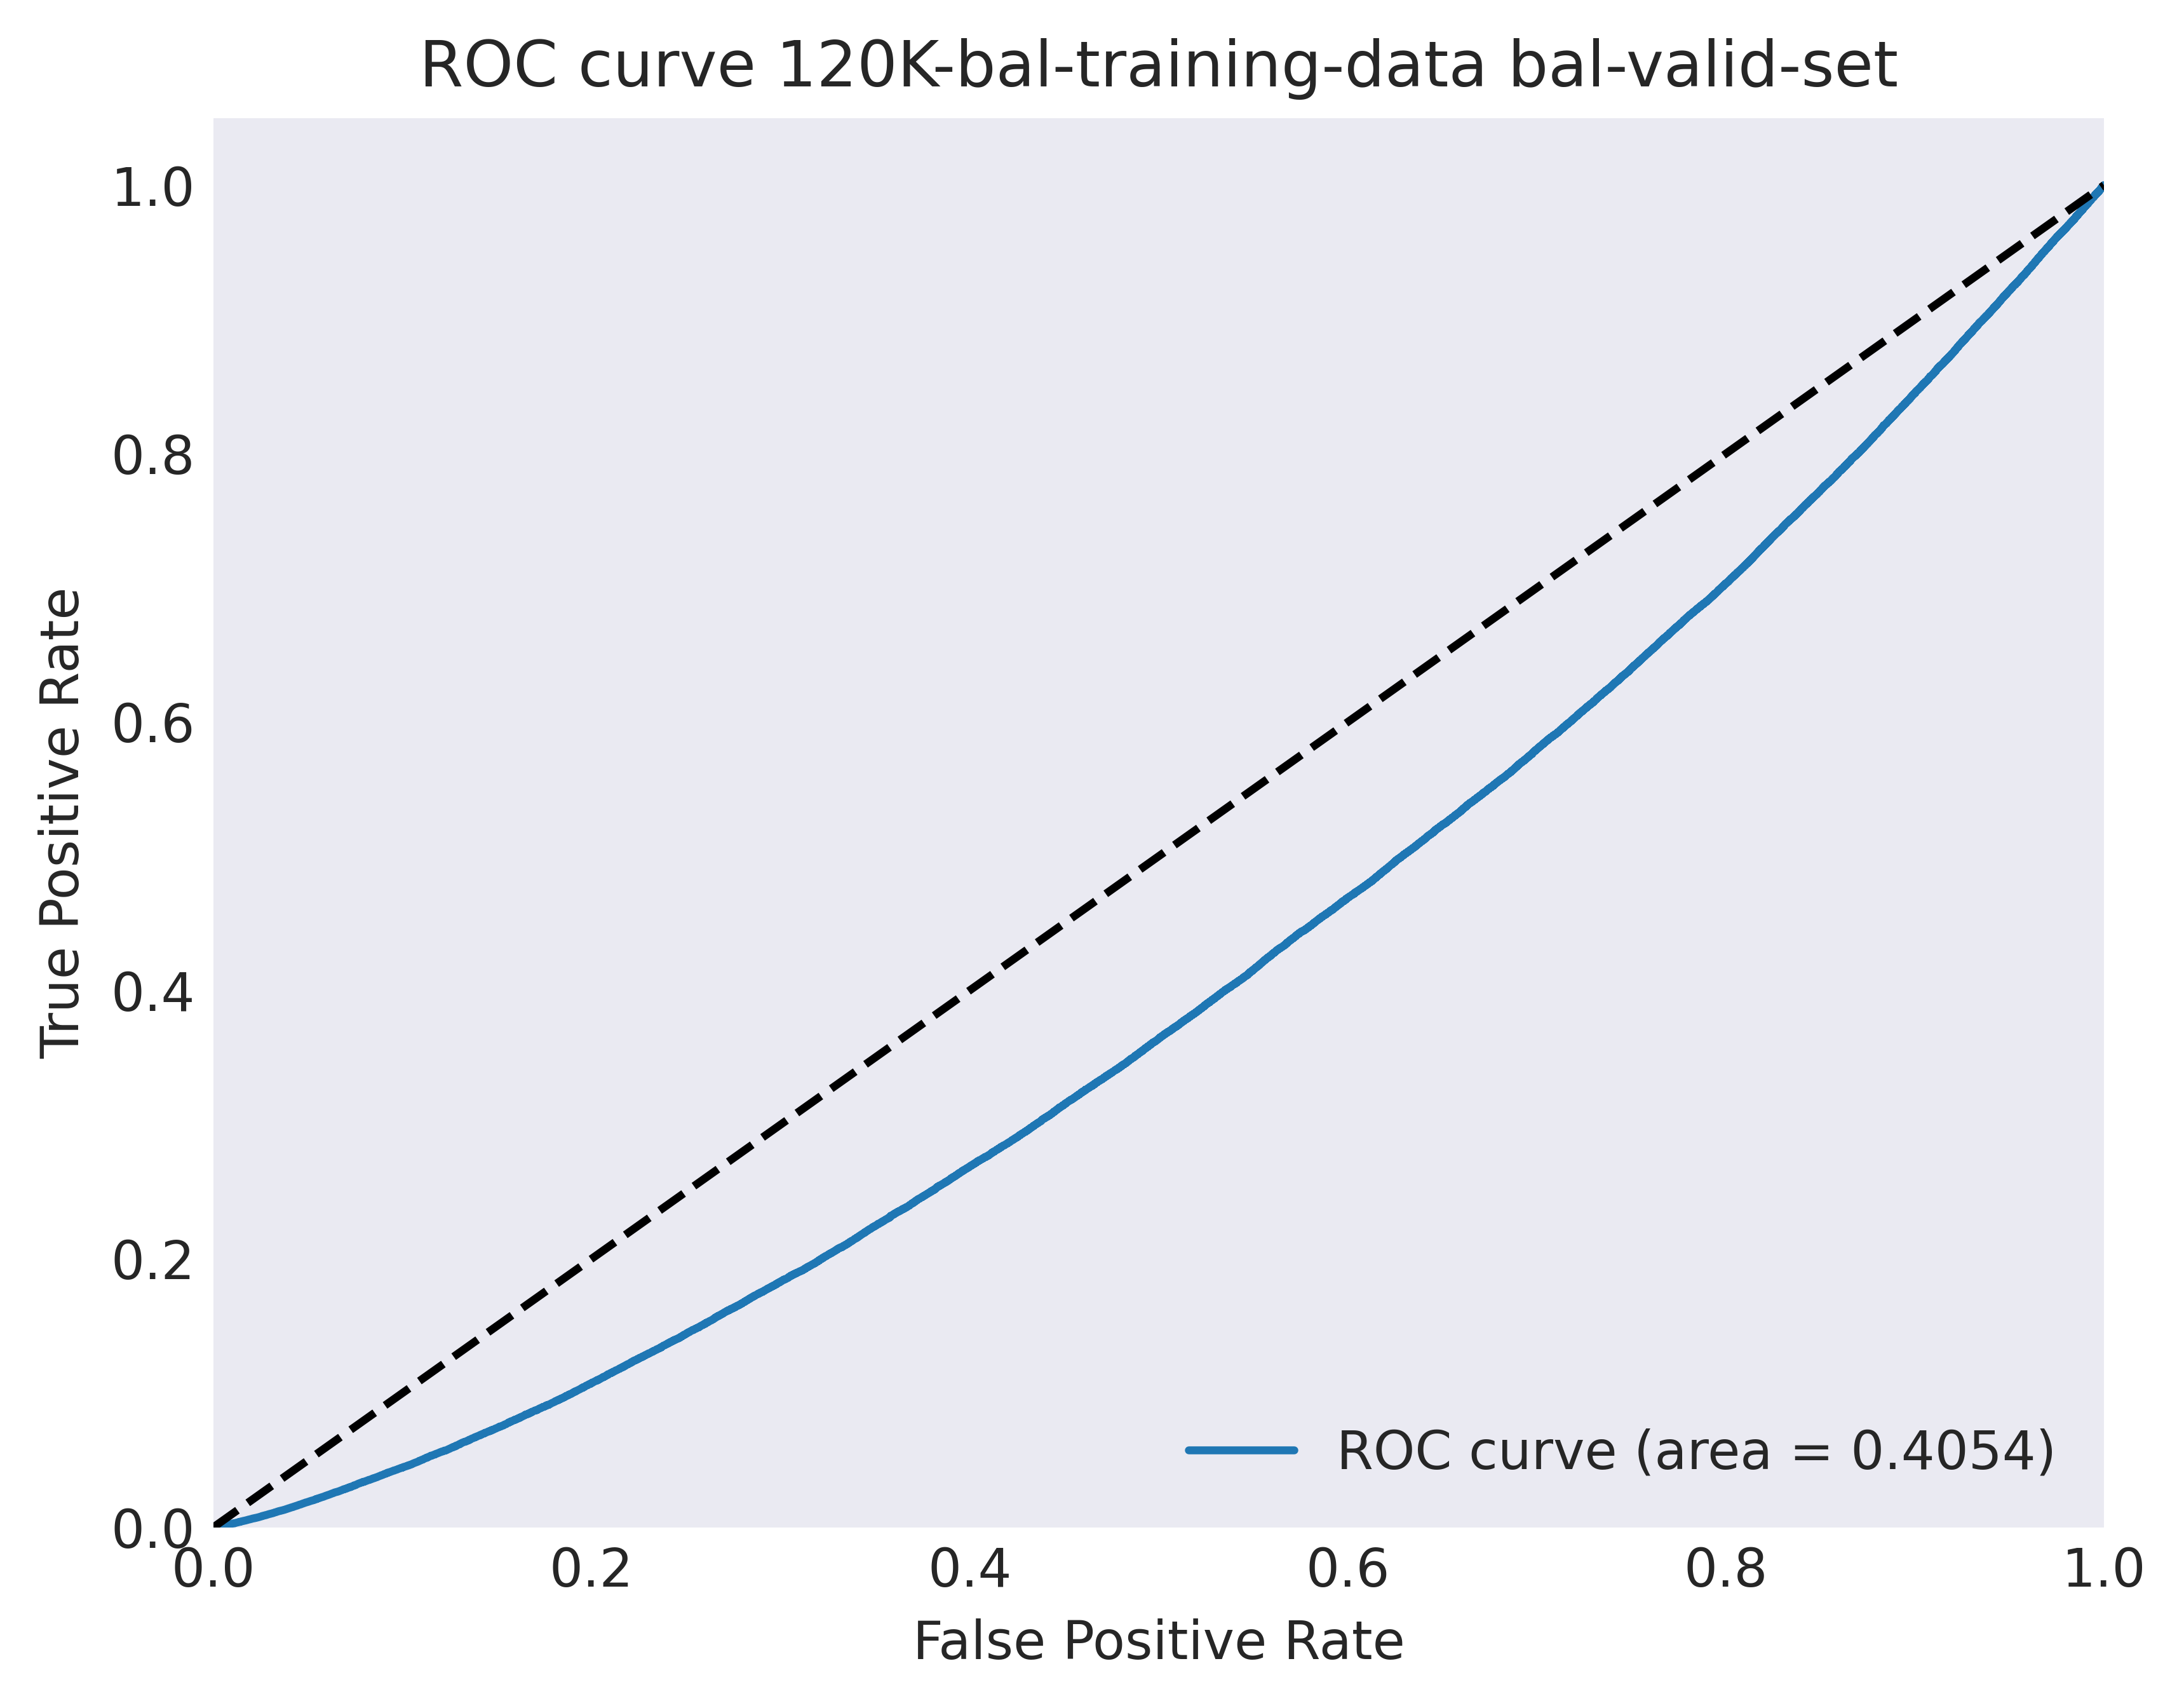

In [29]:
evaluation_functions.plot_roc_curve_binary(
    y_bal_valid, y_bal_valid_pred_prob, 
    title=f'ROC curve {DATASET_SIZE}K-{"bal" if DATASET_IS_BALANCED else "imbal"}-training-data bal-valid-set', 
    save=SAVE_EVAL_RESULTS,
    save_filename=Path.joinpath(eval_valid_bal_folder, f'roc_curve_valid_bal.png')
)

In [30]:
# add ROC area to report_dict
bal_valid_classification_result_dict['roc_auc'] = roc_auc_score(y_bal_valid, y_bal_valid_pred_prob)

bal_valid_report_df = evaluation_functions.create_classification_report_df(bal_valid_classification_result_dict, training_name)

# save the dataframe
if SAVE_EVAL_RESULTS:
    bal_valid_report_df.to_csv(Path.joinpath(eval_valid_bal_folder, "{}_{}_valid_bal_report.csv".format(
        training_name,
        training_args_datetime.strftime("%Y-%m-%d")
    )))

on fixed validation set (imbalanced)

In [31]:
y_imbal_valid_pred_prob_raw = model.predict(valid_imbal_dataset)

y_imbal_valid_pred = np.argmax(y_imbal_valid_pred_prob_raw, axis=1)

y_imbal_valid_pred_prob = y_imbal_valid_pred_prob_raw if len(np.unique(y_imbal_valid_pred)) > 2 \
                else np.array([y_imbal_valid_pred_prob_raw[i, pred] for i, pred in enumerate(list(y_imbal_valid_pred))])

7156/7229 [============================>.] - ETA: 0s

In [ ]:
imbal_valid_classification_result_dict = evaluation_functions.print_classification_report(y_imbal_valid, y_imbal_valid_pred)

Classification report: 
               precision    recall  f1-score   support

           0       0.59      0.73      0.65    150928
           1       0.94      0.90      0.92    774377

    accuracy                           0.87    925305
   macro avg       0.77      0.82      0.79    925305
weighted avg       0.89      0.87      0.88    925305



TN - True Negative 110256
FN - False Negative 76932
TP - True Positive 697445
FP - False Positive 40672
Accuracy Rate: 0.8729024483818849
Misclassification Rate: 0.12709755161811512
F1-Score: 0.7872117615409838
ROC-AUC 0.8155867770910701


In [ ]:
imbal_valid_classification_result_dict

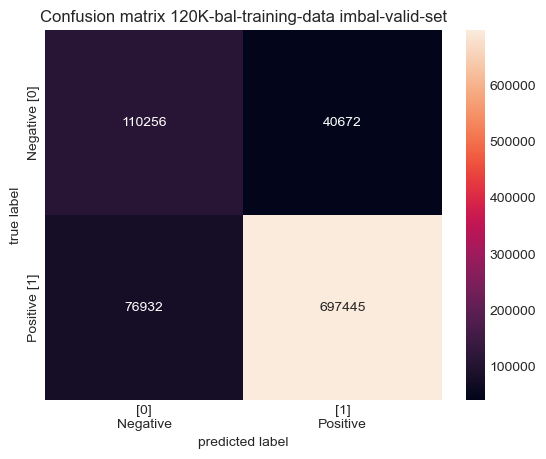

In [ ]:
evaluation_functions.create_confusion_matrix_graph(
    y_imbal_valid, y_imbal_valid_pred, 
    title=f'Confusion matrix {DATASET_SIZE}K-{"bal" if DATASET_IS_BALANCED else "imbal"}-training-data imbal-valid-set',
    save=SAVE_EVAL_RESULTS,
    save_filename=Path.joinpath(eval_valid_imbal_folder, f'confusion_matrix_valid_imbal.png')
)

0.6607504836925339


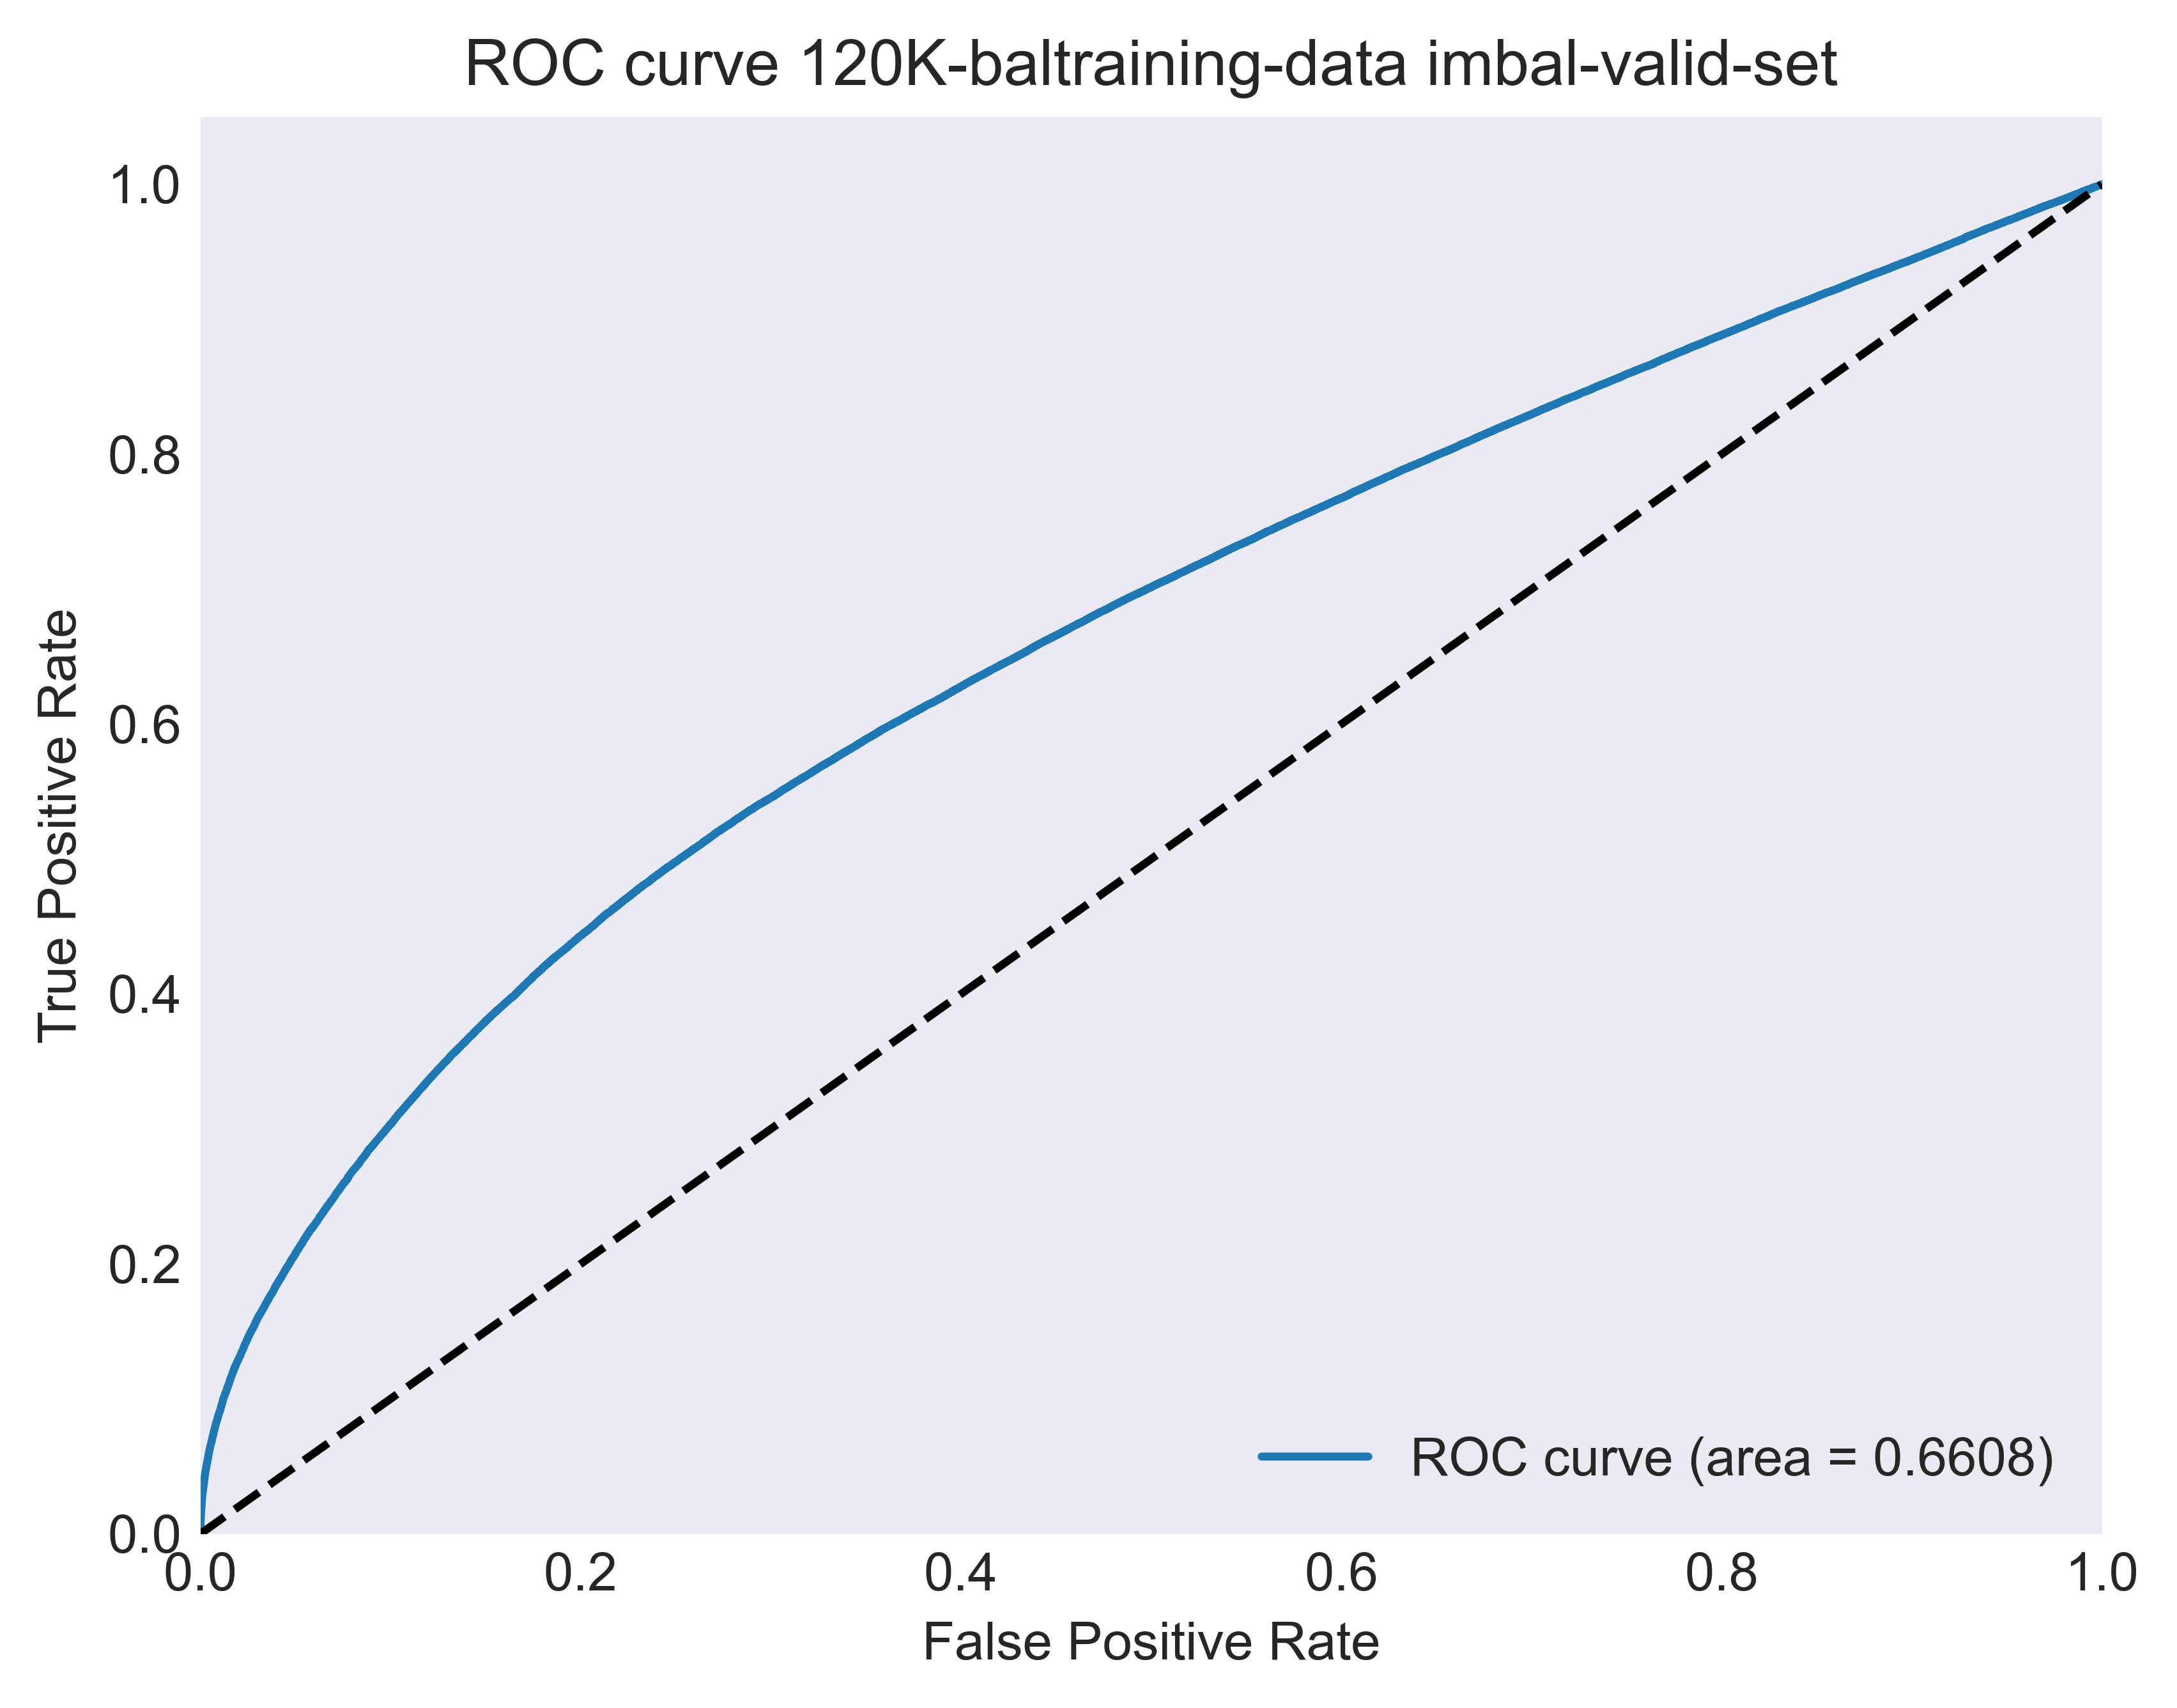

In [ ]:
evaluation_functions.plot_roc_curve_binary(
    y_imbal_valid, y_imbal_valid_pred_prob, 
    title=f'ROC curve {DATASET_SIZE}K-{"bal" if DATASET_IS_BALANCED else "imbal"}-training-data imbal-valid-set',
    save=SAVE_EVAL_RESULTS,
    save_filename=Path.joinpath(eval_valid_imbal_folder, f'roc_curve_valid_imbal.png')
)

In [ ]:
# add ROC area to report_dict
imbal_valid_classification_result_dict['roc_auc'] = roc_auc_score(y_imbal_valid, y_imbal_valid_pred_prob)

imbal_valid_report_df = evaluation_functions.create_classification_report_df(imbal_valid_classification_result_dict, training_name)

# save the dataframe
if SAVE_EVAL_RESULTS:
    imbal_valid_report_df.to_csv(Path.joinpath(eval_valid_imbal_folder, "{}_{}_valid_imbal_report.csv".format(
        training_name,
        training_args_datetime.strftime("%Y-%m-%d")
    )))

Evluation end